In [1]:
from tools import *
%matplotlib notebook
import pandas as pd

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

fig_width_pt = 240.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inches
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height =fig_width*golden_mean       # height in inches
fig_size = [fig_width,fig_height]

In [8]:
exs = np.load('output/extinctions.npy')[2]

<IPython.core.display.Javascript object>


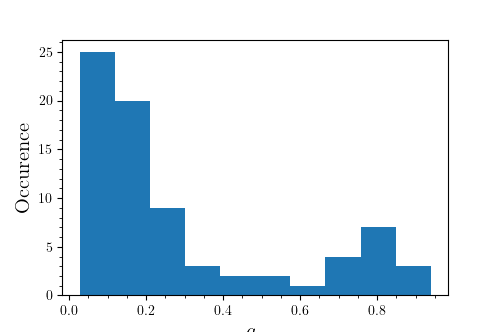

In [62]:
fig = plt.figure()
plt.hist(exs);
plt.xlabel('$a_v$',fontsize=15)
plt.ylabel('Occurence',fontsize=15)
plt.minorticks_on()

fig.set_size_inches(fig_width*1.5,fig_width)
plt.savefig('C2_extinction.pdf', bbox_inches="tight")

In [24]:
fp = np.zeros((10,10))
fp[0:2,0:2] = np.nan
fp[8:10,8:10] = np.nan
fp[0:2,8:10] = np.nan
fp[8:10,0:2] = np.nan

fp[0,2] = 4; fp[0,3] = 3; fp[1,2] = 1; fp[1,3] = 2
fp[0,4] = 8; fp[0,5] = 7; fp[1,4] = 5; fp[1,5] = 6
fp[0,6] = 12; fp[0,7] = 11; fp[1,6] = 9; fp[1,7] = 10

fp[2,0] = 15; fp[2,1] = 14; fp[3,0] = 16; fp[3,1] = 13
fp[2,2] = 20; fp[2,3] = 19; fp[3,2] = 17; fp[3,3] = 18
fp[2,4] = 24; fp[2,5] = 23; fp[3,4] = 21; fp[3,5] = 22
fp[2,4] = 24; fp[2,5] = 23; fp[3,4] = 21; fp[3,5] = 22
fp[2,6] = 25; fp[2,7] = 28; fp[3,6] = 26; fp[3,7] = 27
fp[2,8] = 29; fp[2,9] = 32; fp[3,8] = 30; fp[3,9] = 31

fp[4,0] = 35; fp[4,1] = 34; fp[5,0] = 36; fp[5,1] = 33
fp[4,2] = 39; fp[4,3] = 38; fp[5,2] = 40; fp[5,3] = 37
fp[4,4] = 43; fp[4,5] = 42; fp[5,4] = 44; fp[5,5] = 41
fp[4,6] = 45; fp[4,7] = 48; fp[5,6] = 46; fp[5,7] = 47
fp[4,8] = 49; fp[4,9] = 52; fp[5,8] = 50; fp[5,9] = 51

fp[6,0] = 55; fp[6,1] = 54; fp[7,0] = 56; fp[7,1] = 53
fp[6,2] = 59; fp[6,3] = 58; fp[7,2] = 60; fp[7,3] = 57
fp[6,4] = 62; fp[6,5] = 61; fp[7,4] = 63; fp[7,5] = 64
fp[6,6] = 66; fp[6,7] = 65; fp[7,6] = 67; fp[7,7] = 68
fp[6,8] = 69; fp[6,9] = 72; fp[7,8] = 70; fp[7,9] = 71


fp[8,2] = 74; fp[8,3] = 73; fp[9,2] = 75; fp[9,3] = 76
fp[8,4] = 78; fp[8,5] = 77; fp[9,4] = 79; fp[9,5] = 80
fp[8,6] = 82; fp[8,7] = 81; fp[9,6] = 83; fp[9,7] = 84



In [28]:
zp_fp = fp.copy()
for i in range(len(chan)):
    zp_fp[zp_fp == chan[i]] = exs[i]
zp_fp[zp_fp> 1] = np.nan

<IPython.core.display.Javascript object>


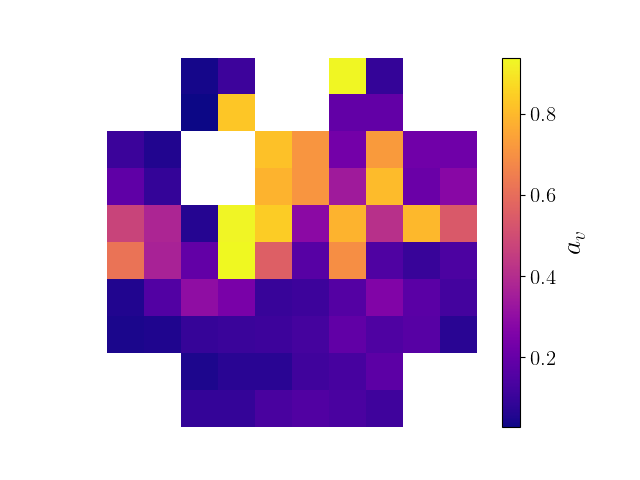

In [60]:
plt.figure()
im = plt.imshow(zp_fp,cmap='plasma')
frame = plt.gca()
frame.axes.get_xaxis().set_ticks([])
frame.axes.get_yaxis().set_ticks([])
cbar = plt.colorbar()
cbar.set_label('$a_v$',fontsize=20)
cbar.ax.tick_params(labelsize=15)
plt.gca().axis('off')
fig.set_size_inches(fig_width,fig_width)
plt.savefig('C2_extinction_fp.pdf')

In [31]:
from scipy.interpolate import griddata

In [40]:
x = np.arange(0, fp.shape[1])
y = np.arange(0, fp.shape[0])
arr = np.ma.masked_invalid(zp_fp)
xx, yy = np.meshgrid(x, y)
#get only the valid values
x1 = xx[~arr.mask]
y1 = yy[~arr.mask]
newarr = arr[~arr.mask]

estimate = griddata((x1, y1), newarr.ravel(),
                          (xx, yy),method='cubic')

estimate[np.isnan(fp)] = np.nan

<IPython.core.display.Javascript object>


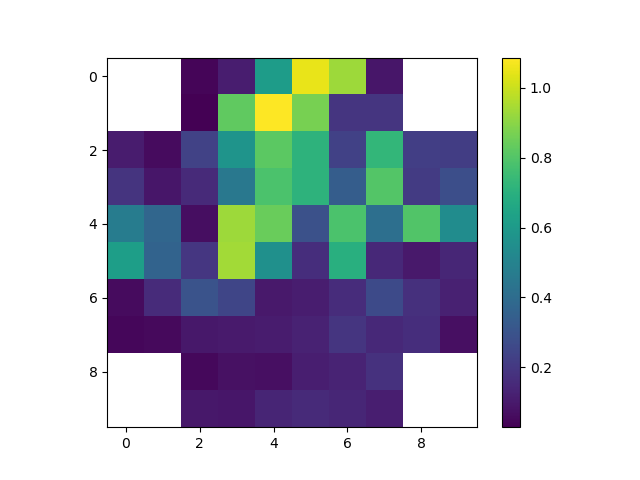

In [41]:
plt.figure()
plt.imshow(estimate)#,origin='lower')
plt.colorbar()

<IPython.core.display.Javascript object>


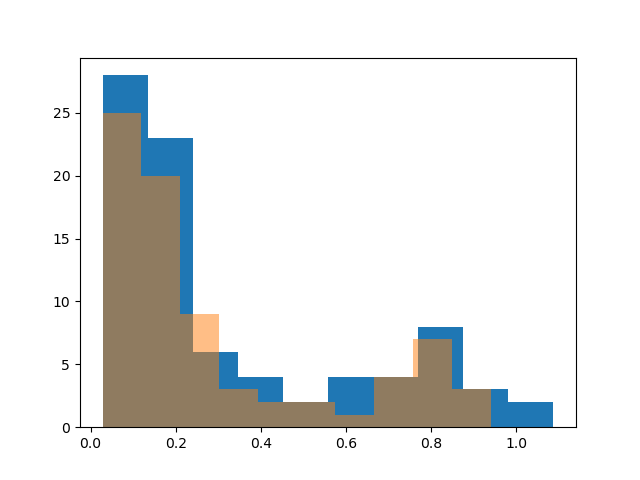

''

In [45]:
plt.figure()
plt.hist(estimate.flatten())
plt.hist(exs,alpha=.5)
;

In [2]:
data = pd.read_csv('../calibration/kepler/K2_all_PS1_psc_ev.csv')
data = data.iloc[(data['PDC'].values > 0)]
data['gMeanPSFMagErr'] = data['gMeanPSFMagErr'].values * (1.012) 
data['rMeanPSFMagErr'] = data['rMeanPSFMagErr'].values * (1.005) 
data['iMeanPSFMagErr'] = data['iMeanPSFMagErr'].values * (1.005) 
data['zMeanPSFMagErr'] = data['zMeanPSFMagErr'].values * (1.005)
data['kMeanPSFMag'] = -2.5*np.log10(data['PDC'].values)
data['kMeanPSFMagErr'] = np.abs(data['PDCe'].values) / np.abs(data['PDC'].values)/10
#data = data.iloc[data['kMeanPSFMagErr'].values < 0.1] 

cind =  ((data['campaign'].values == 2) & (data['Channel'].values == 67))
data = data.iloc[cind]

ex, dat = Tonry_reduce(data)

compare = np.array([['r-i','g-r']])   
tonry = np.loadtxt(os.path.join(dirname,'Tonry_splines.txt'))

In [6]:
ex

array([0.18091776])

<IPython.core.display.Javascript object>


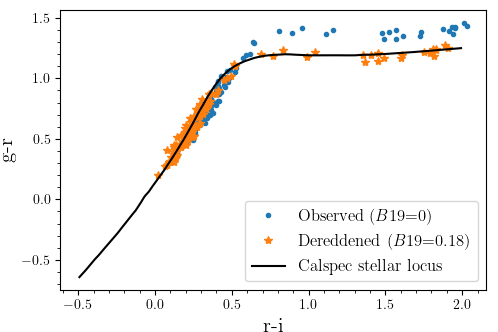

In [12]:
test = Make_colours(dat,tonry,compare,Extinction = ex, Tonry = True)
none = Make_colours(dat,tonry,compare,Extinction = 0, Tonry = True)

fig = plt.figure()
#plt.title('$a_v$ = {}'.format(ex[0]))
plt.plot(none['obs r-i'][0],none['obs g-r'][0],'.',label='Observed $(B19$=0)')
plt.plot(test['obs r-i'][0],test['obs g-r'][0],'*',label='Dereddened $(B19$=0.18)')
plt.plot(test['mod r-i'],test['mod g-r'],'k',label='Calspec stellar locus')
plt.ylabel('g-r',fontsize=15)
plt.xlabel('r-i',fontsize=15)
plt.legend(fontsize=12)
plt.minorticks_on()
plt.tight_layout()
fig.set_size_inches(1.5*fig_width,fig_width)
plt.savefig('av_fit_example.pdf')

In [10]:
x = dat['rMeanPSFMag'] - dat['iMeanPSFMag']
y = dat['gMeanPSFMag'] - dat['rMeanPSFMag']

x2 = data['rMeanPSFMag'] - data['iMeanPSFMag']
y2 = data['gMeanPSFMag'] - data['rMeanPSFMag']

<IPython.core.display.Javascript object>


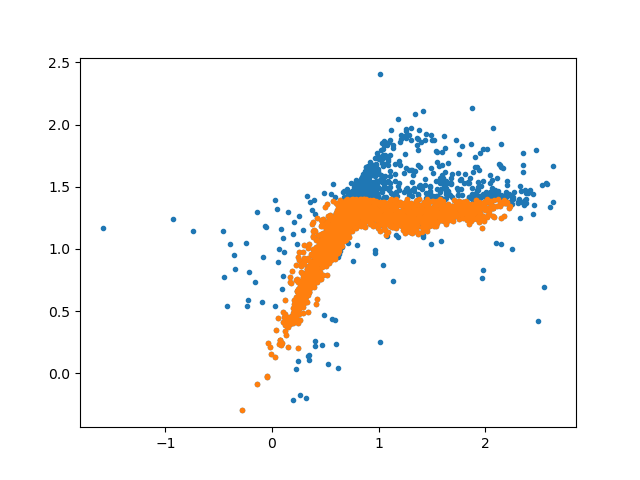

In [11]:
plt.figure()
plt.plot(x2,y2,'.')
plt.plot(x,y,'.')

In [14]:
a['mod r-i']

array([-0.49237805, -0.49137805, -0.49037805, ...,  1.99062195,
        1.99162195,  1.99262195])

# Not needed, data product saved

In [27]:
exs = []
chan = []
for i in range(84):
    i += 1
    data = pd.read_csv('../calibration/kepler/K2_all_PS1_psc_ev.csv')
    data = data.iloc[(data['PDC'].values > 0)]
    data['gMeanPSFMagErr'] = data['gMeanPSFMagErr'].values * (1.012) 
    data['rMeanPSFMagErr'] = data['rMeanPSFMagErr'].values * (1.005) 
    data['iMeanPSFMagErr'] = data['iMeanPSFMagErr'].values * (1.005) 
    data['zMeanPSFMagErr'] = data['zMeanPSFMagErr'].values * (1.005)
    data['kMeanPSFMag'] = -2.5*np.log10(data['PDC'].values)
    data['kMeanPSFMagErr'] = np.abs(data['PDCe'].values) / np.abs(data['PDC'].values)/10
    #data = data.iloc[data['kMeanPSFMagErr'].values < 0.1] 

    cind =  ((data['campaign'].values == 2) & (data['Channel'].values == i))
    data = data.iloc[cind]
    try:
        ex, dat = Tonry_reduce(data)

        compare = np.array([['r-i','g-r']])   
        tonry = np.loadtxt(os.path.join(dirname,'Tonry_splines.txt'))
        test = Make_colours(dat,tonry,compare,Extinction = ex, Tonry = True)

        exs += [ex[0]]
        chan += [i]
    except:
        pass
exs = np.array(exs)
chan = np.array(chan)